## Unsupervised Learning


- K means clustering
- Hierarchical clustering
- Association rules learning

## 1. K means clustering


- How K means works - online demo:

https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs

from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

#### Simulated data set

(100, 2)


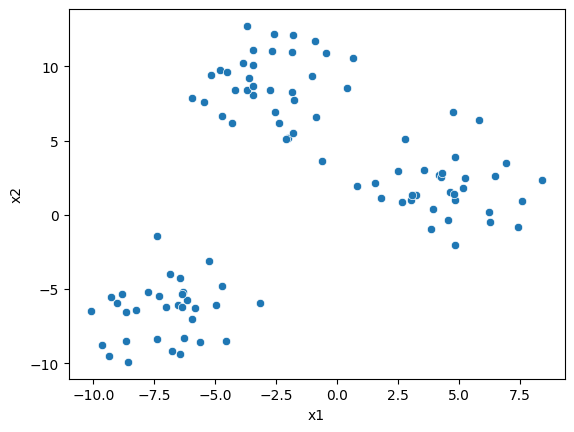

In [2]:
X, y = make_blobs(random_state = 42, cluster_std = 2)
df = pd.DataFrame(X, columns = ['x1', 'x2'])
sns.scatterplot(x = 'x1', y = 'x2', data = df);
print(X.shape)

#### Training a K-means model

Goal: find naturally formed data groups and assign a label (cluster number or name) to each group

In [3]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42) ## n_clusters is pre-specified as a hyperparameter
km.fit(X)

KMeans(n_clusters=3, random_state=42)

- we don't split the data into training and testing sets because there are no labels so we cannot test the model on new data

### K-Means model output

#### Cluster Centroids

In [4]:
### the model computes K cntroids and assign each data point to one of the centroids

km.cluster_centers_

array([[ 4.35914117,  1.90467057],
       [-7.02379204, -6.47232379],
       [-2.82641022,  8.85723525]])

#### Cluster Labels

In [5]:
## K means also assigns cluster label (integer number) to each data row
km.labels_

array([1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2,
       2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2])

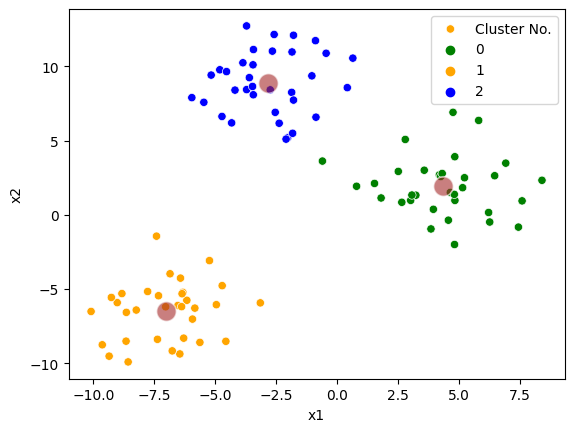

In [6]:
## Let's visualize:
## Cluster names (labels) are colour-coded. The centroids are shown as brown dots

sns.scatterplot(x = 'x1', y = 'x2', data = df, hue = km.labels_, palette=['green','orange', 'blue'], label = "Cluster No.")
sns.scatterplot(x = km.cluster_centers_[:,0], y = km.cluster_centers_[:,1], s = 200, alpha = 0.6, color = 'brown');

__What happens on each iteration?__

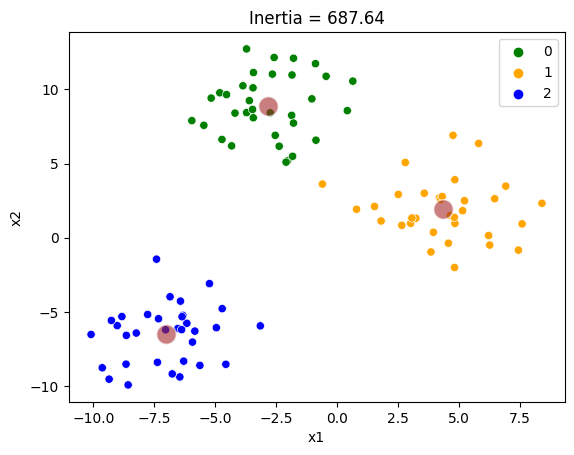

In [7]:
km = KMeans(n_clusters=3, random_state=12, init = 'random', n_init = 1, max_iter=7) 
## try for max_iter = 1, 2, 3, ..., 10
km.fit(X)
ax = sns.scatterplot(x = 'x1', y = 'x2', data = df, hue = km.labels_, palette=['green','orange', 'blue'])
ax = sns.scatterplot(x = km.cluster_centers_[:,0], y = km.cluster_centers_[:,1], s = 200, alpha = 0.6, color = 'brown')
ax.set_title('Inertia = ' + str(np.round(km.inertia_, decimals = 2)));

In [8]:
km = KMeans(n_clusters=25, random_state=12, init = 'random', n_init = 1, max_iter=7) 
## try for max_iter = 1, 2, 3, ..., 10
km.fit(X)
km.inertia_

89.61313131416568

#### How do we know what K to choose?

-  Compute the Inertia = sum of squares of the distance between each data point and its centroid
- A good model has low inertia AND a small number of clusters ( K )
- Example:

(400, 2)


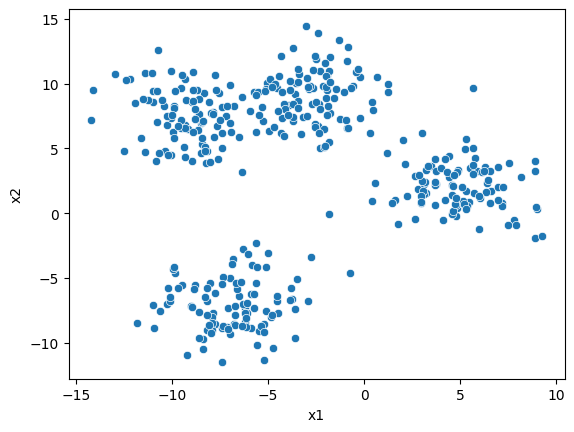

In [9]:
X, y = make_blobs(random_state = 42, cluster_std = 2, n_samples = [100, 100, 100, 100])
df = pd.DataFrame(X, columns = ['x1', 'x2'])
sns.scatterplot(x = 'x1', y = 'x2', data = df);
print(X.shape)

In [10]:
km.inertia_  ## inertia = model score (similar to MSE)

89.61313131416568

#### Elbow Method

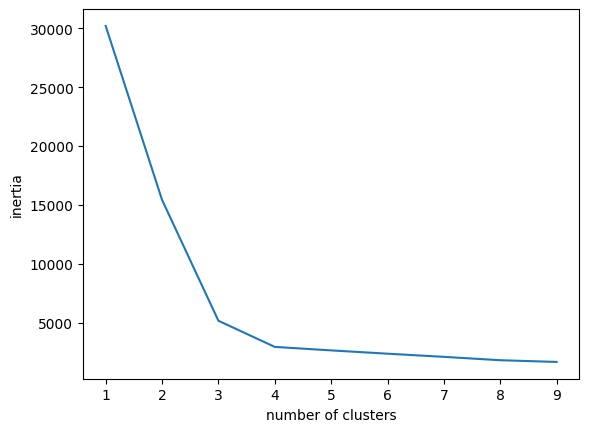

In [11]:
inertia = []
for i in range(1, 10):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)
    
sns.lineplot(y = inertia, x = range(1,10))
plt.xlabel("number of clusters")
plt.ylabel("inertia");

The optial number of clusters is 4 - this is the so called ___knee point___ rule

What happens if we chose a sub-optimal number of clusters?

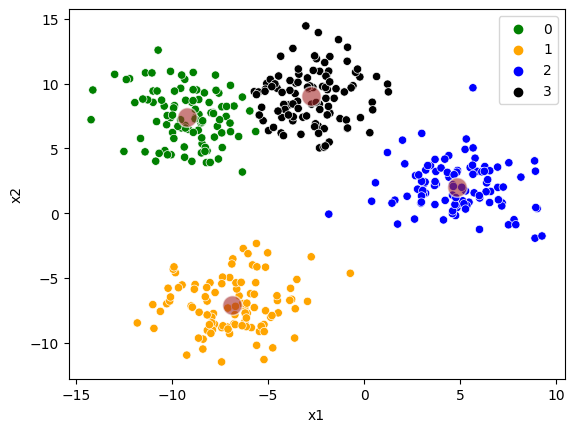

In [12]:
km = KMeans(n_clusters=4, random_state=42) 
## try forn_cluster = 3, 4, 5
my_colours = ['green','orange', 'blue', 'black', 'magenta', 'yellow', 'cyan']
km.fit(X)
sns.scatterplot(x = 'x1', y = 'x2', data = df, hue = km.labels_, palette=my_colours[:4])
sns.scatterplot(x = km.cluster_centers_[:,0], y = km.cluster_centers_[:,1], s = 200, alpha = 0.6, color = 'brown');

#### Silhouette Method
- silhouette value is a measure of how similar a data point is to its own cluster (cohesion) compared to other clusters (separation)
- silhouette score is a mean silhouette value for all data points
- silhouette score  > 0.5 indicates strong clustering 
- 0.25 < silhouette score < 0.5 indicates fair clustering
- -1 < silhouette score < +0.25 - no clustering

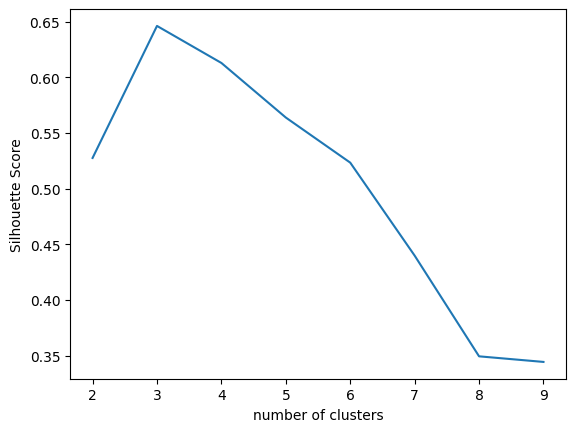

In [13]:
silhouette = []
for i in range(2, 10):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X)
    silhouette.append(silhouette_score(X, km.fit_predict(X)))
    
sns.lineplot(y = silhouette, x = range(2,10))
plt.xlabel("number of clusters")
plt.ylabel("Silhouette Score");



The purpose of unsupervised learning is to discover a hidden categorical variable.

Example: discover customer segments

#### K-means Summary

##### Pros:

* scalable
* easy to compute
* can be relatively easy to interpret

##### Cons:
* efficient only for convex-shaped clusters; not all types of clusters can be described as distance from a centroid

##### Notes:
* K-means requires data to be scaled
* K-means can handle both numerical and categorical (one-hot encoded) data
* for only categorical data, use ___K-modes___


## 2. Hierarchical clustering analysis (HCA)

##### Pros:

* computes clusters based on pairwise distances between data points
* doesn't need a centroid or a pre-assigned number of clusters
* represents natural grouping of data regardless of cluster shape
* can handle complex concaved data groups such as the "smiley face" from the K-means demo

##### Cons:

* computationally expensive 
 - for a 100-row data set, K-Means requires 100 distances from the centroids; HCA needs 4900 pairwise distances
 - for a 10-million row data set, HCA will need to compute ~ 49 trillion distnces - this will consume 0.4 Petabyte of your RAM :) )
* ... hence, not scalable

##### Notes:

* There are a few distinct methods of computing the distance
* There are different methods for cluster linkage
* Choosing the right one may or may not have specific guidelines and should be approached as a hyperparaeter optimization problem. Defalut distance method is Euclidian, default linkage method is Ward.

<img src="../images/distance.png" alt="KNN" width="600" height="600">

https://stackoverflow.com/questions/30824626/how-do-i-choose-a-linkage-method-for-hierarchical-agglomerative-clustering

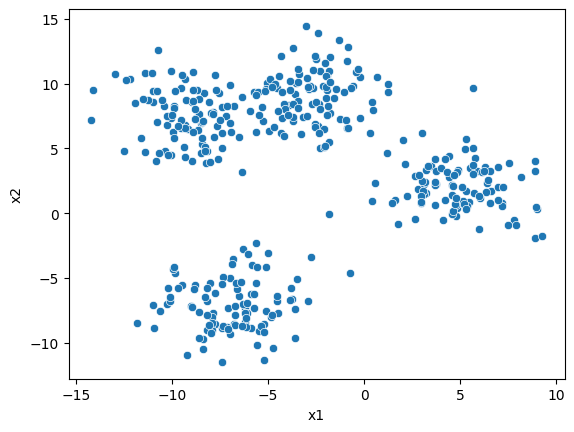

In [14]:
X, y = make_blobs(random_state = 42, cluster_std = 2, n_samples = [100, 100, 100, 100])
df = pd.DataFrame(X, columns = ['x1', 'x2'])
sns.scatterplot(x = 'x1', y = 'x2', data = df);

#### Building an HCA model includes the following steps:
1. Analyze the dendrogram plot and decide on the number of clusters (using a silhouette score or visual assessent of the dendrogram)
    - _The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). b is the distance between a sample and the nearest cluster to which the sample does not belong._
2. Train a HCA model (agglomerative or divisive) by computing a distance matrix
3. Build clusters using a specif linkage method 

In [15]:
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

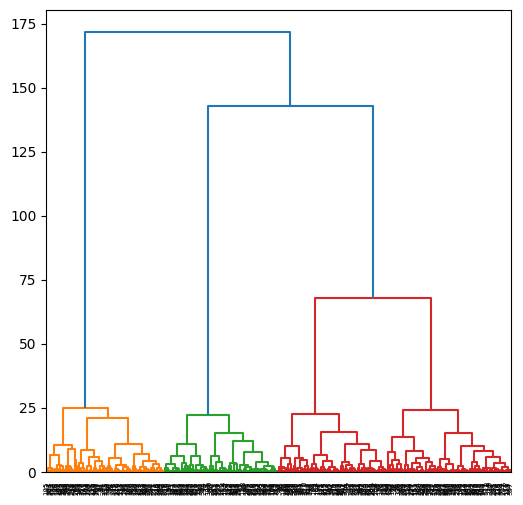

In [16]:
## cluster dendrogram describes distances between the clusters

plt.figure(figsize =(6, 6)) 
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward'))) 

https://www.displayr.com/what-is-dendrogram/

https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c

- Hierarchical clustering dendrogram is a tree-like visualization that depicts the merging process of data points or clusters. 
- The dendrogram's branches represent merged clusters. Each branch's height represents the "distance" (a dissimilarity metric, not geometrical distance) at which the merging occurred
- Lower heights indicate that the merged clusters were more similar or had a smaller distance between them.
- Higher heights indicate that the merged clusters were more dissimilar or had a larger distance between them.
- By inspecting the heights you can identify clusters that are very close together (low height) and those that are quite distinct (high height). This information can help you decide on the appropriate number of clusters.

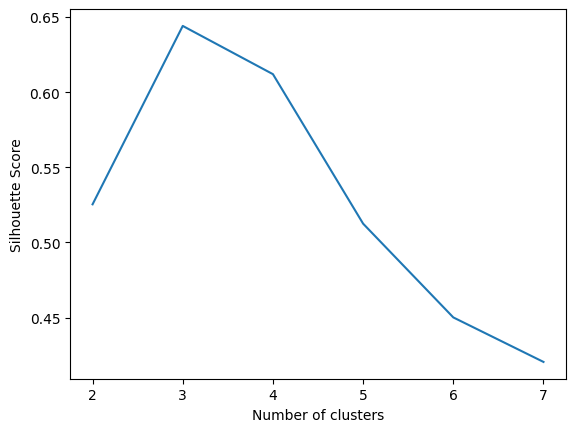

In [17]:
## silhouette score 

silhouette_scores = [] 

for i in range(2, 8):
    silhouette_scores.append(silhouette_score(X, AgglomerativeClustering(n_clusters = i, linkage = 'ward').fit_predict(X))) 
    
plt.plot(range(2, 8), silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

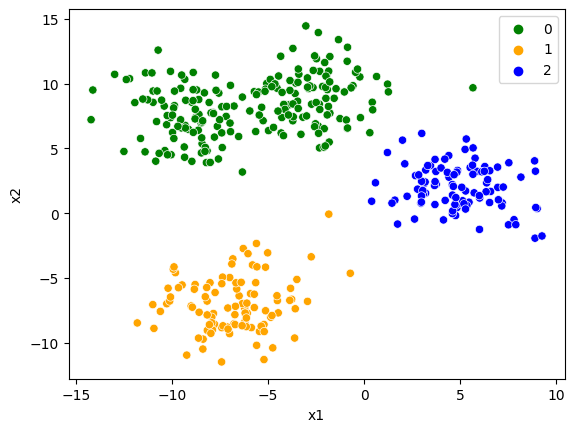

In [18]:
agg =  AgglomerativeClustering(n_clusters = 3)
agg.fit(X)
sns.scatterplot(x = 'x1', y = 'x2', data = df, 
                hue = AgglomerativeClustering(n_clusters = 3, linkage = 'ward').fit_predict(X), 
                palette=my_colours[:3]);

## 3. Association Rules


Association rules describe co-occurring events or items. The earliest and stil most popular use case for AR mining is market basket analysis.

Other examples include:

- Recommendation systems (if a customer buys products A, B and C, they are likely to be interested in D and E)
- Predictive maintenance (events A, B and D lead to falure F)
- Generally, event groups related to risk management
- Your own examples?


Data

- Each data row is called transaction and contains lists of events or items
- Number of elements in each row doesn't need to be te same so the raw data can be represented as a list of lists rather than a data frame
- Association rules are expressed as X => Y (if X then Y) where X is the antecedent itemset and Y is the consequent itemset. X or Y can have one or more items

In [19]:
## if you don't have mlxtend, install it by running the code below:

# !pip install mlxtend

In [20]:
import mlxtend

####  **Apriori Algorithm**

- The Apriori algorithm discovers frequent itemsets (products often bought together, frequently co-occurring faults, etc.) in a transaction dataset by iteratively counting occurrences. This helps identify patterns and relationships for tasks like product recommendation or market basket analysis.

- Apriori is a statistical method which works by computing frequency. It is not iterative as most ML algorithms

Association Rule models are based on the following parameters:

* Support
* Confidence
* Lift


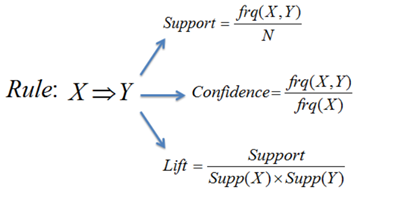


**Support**     :  probability of co-occurrence of X and Y

**Confidence**  :  conditional probability of Y, given that it co-occurs with X

**Lift**        : measure how much more often the antecedent and consequent co-occur than if they were statistically independent


http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/


Let's now walk through the APRIORI algorithm

In [21]:
from mlxtend.frequent_patterns import apriori, association_rules

In [22]:
## Grocery store data - a typical data set for AR mining

df = pd.read_csv('../data/market_basket.csv')
df.head()

,Bread,Cheese,Eggs,Meat,Milk
0,1,1,1,1,0
1,1,1,0,1,1
2,0,1,1,1,1
3,0,1,1,1,1
4,0,0,0,1,0


**Apriori Algorithm and One-Hot Encoding**
 
Using the `TransactionEncoder`, we can transform the list of transactions into one-hot encoded data table. The columns correspond to the items found in the entire dataset. The values are 1 or 0 depending if the particular item is present in a particular transaction.

**Applying Apriori**

To create an Apriori Model, first compute support for each individual itemset:

In [23]:
df_sup = apriori(df, min_support = 0.1, max_len = 3, use_colnames = True, verbose = 1)
df_sup

Processing 30 combinations | Sampling itemset size 3


c:\users\vskor\appdata\local\programs\python\python37\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:113: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  DeprecationWarning,


,support,itemsets
0,0.504762,(Bread)
1,0.501587,(Cheese)
2,0.438095,(Eggs)
3,0.476190,(Meat)
4,0.501587,(Milk)
5,0.238095,"(Cheese, Bread)"
6,0.187302,"(Bread, Eggs)"
7,0.206349,"(Meat, Bread)"
8,0.279365,"(Milk, Bread)"
9,0.298413,"(Cheese, Eggs)"


In [24]:
#then build and ranck the rules
df_ar = association_rules(df_sup, metric = "confidence", min_threshold = 0)

df_ar = df_ar[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
df_ar.columns = ['if_customer_buys', 'recommend', 'support', 'confidence', 'lift']
df_ar.sort_values('confidence', ascending = False, ignore_index=True).head(20)


,if_customer_buys,recommend,support,confidence,lift
0,"(Meat, Milk)",(Cheese),0.203175,0.831169,1.657077
1,"(Meat, Eggs)",(Cheese),0.215873,0.809524,1.613924
2,"(Milk, Eggs)",(Cheese),0.196825,0.805195,1.605293
3,"(Meat, Milk)",(Eggs),0.177778,0.727273,1.660079
4,"(Milk, Eggs)",(Meat),0.177778,0.727273,1.527273
5,"(Cheese, Eggs)",(Meat),0.215873,0.723404,1.519149
6,"(Meat, Bread)",(Cheese),0.142857,0.692308,1.380234
7,(Eggs),(Cheese),0.298413,0.681159,1.358008
8,(Meat),(Cheese),0.323810,0.680000,1.355696
9,"(Meat, Eggs)",(Milk),0.177778,0.666667,1.329114
